In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
student_data = pd.read_csv(r'E:\DSA\Statistics\StudentsPerformance.csv')

In [3]:
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


## Count of males and females participated in the test

In [4]:
student_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

## Parent level of education

In [5]:
student_data['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [6]:
student_data['parental level of education'].isna().sum()

0

In [7]:
student_data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'some high school'),
  Text(1, 0, 'high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

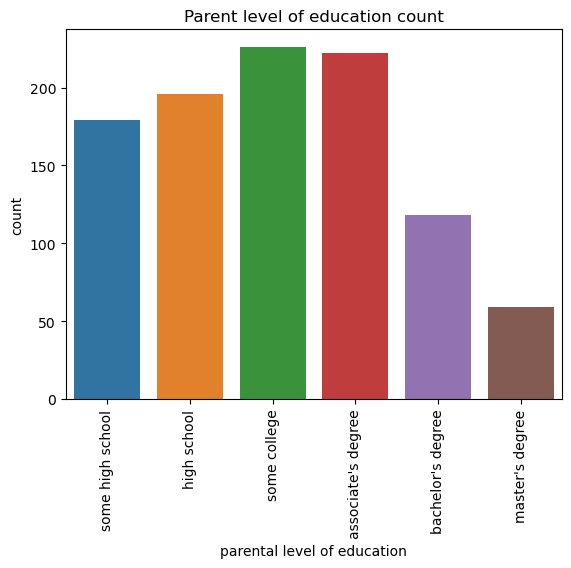

In [9]:
plt.title('Parent level of education count')
sns.countplot(x='parental level of education',data = student_data)
plt.xticks(rotation = 90)


In [10]:
student_data['test preparation course'].isna().sum()

0

## Mean of math score,reading and writing based on gender and test preparation

In [11]:
student_data_mean = student_data[["math score","reading score","writing score"]].mean()
print(student_data_mean)

math score       66.001
reading score    69.195
writing score    68.119
dtype: float64


In [12]:
student_data.groupby(['gender','test preparation course']).agg(mean_math_score = ('math score','mean'), mean_reading_score = ('reading score','mean'),mean_writing_score = ('writing score','mean'))

mean_math_score  mean_reading_score  \
gender test preparation course                                        
female completed                      67.108696           77.375000   
       none                           61.320359           69.955090   
male   completed                      72.988506           70.793103   
       none                           66.467532           62.581169   

                                mean_writing_score  
gender test preparation course                      
female completed                         78.793478  
       none                              68.982036  
male   completed                         70.339080  
       none                              59.551948

### Scoring Variation on Math,reading and writing based on gender and test preparation course

In [13]:
student_data_new = student_data.groupby(['gender','test preparation course'])
student_var = student_data_new.var()
student_var

C:\Users\teena\AppData\Local\Temp\ipykernel_20560\1303378630.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  student_var = student_data_new.var()


math score  reading score  writing score
gender test preparation course                                          
female completed                208.173913     161.175546     149.836897
       none                     272.602767     214.241220     225.495172
male   completed                197.098133     185.297987     166.098233
       none                     205.513600     184.843553     181.394687

Text(0, 0.5, 'Variance')

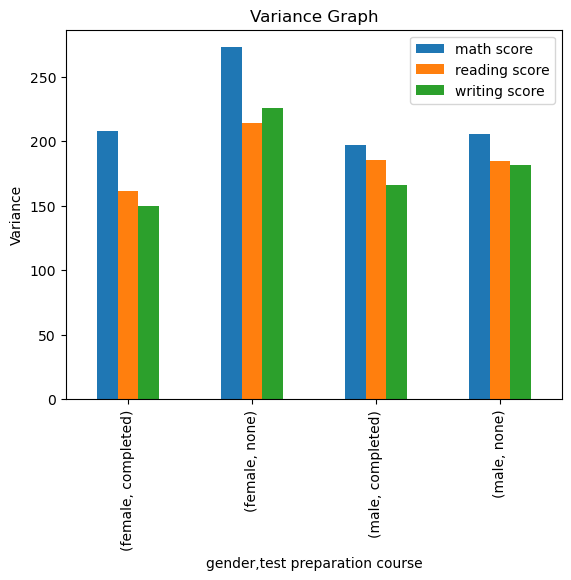

In [14]:
student_var.plot(kind = 'bar')
plt.title('Variance Graph')
plt.ylabel('Variance')

### Data of top 25%

In [15]:
student_sorted = student_data.sort_values(by='math score',ascending= False)
student_sorted

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [16]:
quantile_25 = student_sorted['math score'].quantile(.25)
quantile_25

57.0

In [17]:

student_25 = student_sorted[student_sorted['math score']>quantile_25]
student_25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
165,female,group B,some college,free/reduced,none,58,61,66
164,female,group B,master's degree,free/reduced,completed,58,76,78
163,female,group A,some college,standard,none,58,70,67
627,male,group C,high school,free/reduced,completed,58,51,52


In [18]:
#student_sorted.plot(y='math score',x='parental level of education')
#plt.xticks(rotation = 90)
#plt.show()
